In [1]:
import pymongo
from spearmint.utils import compression
from spearmint.utils import functions
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from spearmint.tasks import input_space
sns.set()

### Connecting MongoDB server

In [2]:
mongo_conn = pymongo.MongoClient('127.0.0.1',27017)
mongo_conn.list_database_names()

[u'admin', u'config', u'local', u'spearmint']

In [3]:
mongo_db = mongo_conn['spearmint']

### Loading document from database

In [4]:
collection_list = mongo_db.list_collection_names()

In [5]:
exp_name = "sep_levy"

In [6]:
jobs_initial5_Mk10_Mj1_exp = []
jobs_initial5_Mk50_Mj1_exp = []
jobs_initial5_Mk200_Mj1_exp = []
jobs_initial5_Mk250_Mj1_exp = []
jobs_initial5_Mk300_Mj1_exp = []

jobs_saa_cumulative_multi_exp = []

recomm_initial5_Mk10_Mj1_exp = []
recomm_initial5_Mk50_Mj1_exp = []
recomm_initial5_Mk200_Mj1_exp = []
recomm_initial5_Mk250_Mj1_exp = []
recomm_initial5_Mk300_Mj1_exp = []

recomm_saa_cumulative_multi_exp = []

for i in range(25):
    if "%s_initial5_Mk10_Mj1-%d.jobs"%(exp_name,i) in collection_list: jobs_initial5_Mk10_Mj1_exp.append(mongo_db["%s_initial5_Mk10_Mj1-%d.jobs"%(exp_name,i)]) 
    if "%s_initial5_Mk50_Mj1-%d.jobs"%(exp_name,i) in collection_list: jobs_initial5_Mk50_Mj1_exp.append(mongo_db["%s_initial5_Mk50_Mj1-%d.jobs"%(exp_name,i)]) 
    if "%s_initial5_Mk200_Mj1-%d.jobs"%(exp_name,i) in collection_list: jobs_initial5_Mk200_Mj1_exp.append(mongo_db["%s_initial5_Mk200_Mj1-%d.jobs"%(exp_name,i)]) 
    if "%s_initial5_Mk250_Mj1-%d.jobs"%(exp_name,i) in collection_list: jobs_initial5_Mk250_Mj1_exp.append(mongo_db["%s_initial5_Mk250_Mj1-%d.jobs"%(exp_name,i)]) 
    if "%s_initial5_Mk300_Mj1-%d.jobs"%(exp_name,i) in collection_list: jobs_initial5_Mk300_Mj1_exp.append(mongo_db["%s_initial5_Mk300_Mj1-%d.jobs"%(exp_name,i)]) 
    if "levy_cumulative_saa_multi_test-%d.jobs"%i in collection_list: jobs_saa_cumulative_multi_exp.append(mongo_db["levy_cumulative_saa_multi_test-%d.jobs"%i])
    
    if "%s_initial5_Mk10_Mj1-%d.recommendations"%(exp_name,i) in collection_list: recomm_initial5_Mk10_Mj1_exp.append(mongo_db["%s_initial5_Mk10_Mj1-%d.recommendations"%(exp_name,i)]) 
    if "%s_initial5_Mk50_Mj1-%d.recommendations"%(exp_name,i) in collection_list: recomm_initial5_Mk50_Mj1_exp.append(mongo_db["%s_initial5_Mk50_Mj1-%d.recommendations"%(exp_name,i)]) 
    if "%s_initial5_Mk200_Mj1-%d.recommendations"%(exp_name,i) in collection_list: recomm_initial5_Mk200_Mj1_exp.append(mongo_db["%s_initial5_Mk200_Mj1-%d.recommendations"%(exp_name,i)]) 
    if "%s_initial5_Mk250_Mj1-%d.recommendations"%(exp_name,i) in collection_list: recomm_initial5_Mk250_Mj1_exp.append(mongo_db["%s_initial5_Mk250_Mj1-%d.recommendations"%(exp_name,i)]) 
    if "%s_initial5_Mk300_Mj1-%d.recommendations"%(exp_name,i) in collection_list: recomm_initial5_Mk300_Mj1_exp.append(mongo_db["%s_initial5_Mk300_Mj1-%d.recommendations"%(exp_name,i)]) 
    if "levy_cumulative_saa_multi_test-%d.recommendations"%i in collection_list: recomm_saa_cumulative_multi_exp.append(mongo_db["levy_cumulative_saa_multi_test-%d.recommendations"%i])

### Get objective method gets the predicted optimal value in GP model

In [47]:
docs = recomm_saa_cumulative_multi_exp[0].find()

In [48]:
for doc in docs:
    print(compression.decompress_nested_container(doc))

{u'num_complete': 1, u'total_elapsed_time': 2.380756139755249, u'objective': None, u'params': {u'x2': {u'type': u'float', u'values': array([4.95000111])}, u'x3': {u'type': u'float', u'values': array([3.00086226])}, u'x1': {u'type': u'float', u'values': array([-3.68644064])}, u'x4': {u'type': u'float', u'values': array([-1.21651846])}}, u'num_complete_tasks': {u'Objective': 1}, u'params_om': None, u'obj_o': None, u'obj_om': None, u'_id': ObjectId('5f6a30942e45fe1a1fffe5e7'), u'params_o': None, u'id': 0}
{u'num_complete': 2, u'total_elapsed_time': 4.499665975570679, u'objective': None, u'params': {u'x2': {u'type': u'float', u'values': array([0.97021342])}, u'x3': {u'type': u'float', u'values': array([2.26532698])}, u'x1': {u'type': u'float', u'values': array([2.36583132])}, u'x4': {u'type': u'float', u'values': array([-3.43341193])}}, u'num_complete_tasks': {u'Objective': 2}, u'params_om': None, u'obj_o': None, u'obj_om': None, u'_id': ObjectId('5f6a30962e45fe1a1fffe7c8'), u'params_o': N

In [7]:
initial5_Mk10_Mj1_objs = functions.get_objective(recomm_initial5_Mk10_Mj1_exp)
initial5_Mk50_Mj1_objs = functions.get_objective(recomm_initial5_Mk50_Mj1_exp)
initial5_Mk200_Mj1_objs = functions.get_objective(recomm_initial5_Mk200_Mj1_exp)
initial5_Mk250_Mj1_objs = functions.get_objective(recomm_initial5_Mk250_Mj1_exp)
initial5_Mk300_Mj1_objs = functions.get_objective(recomm_initial5_Mk300_Mj1_exp)

saa_cumulative_multi = functions.get_objective(recomm_saa_cumulative_multi_exp)

In [8]:
locs_initial5_Mk10_Mj1_exp = functions.get_recomm_loc(recomm_initial5_Mk10_Mj1_exp)
locs_initial5_Mk50_Mj1_exp = functions.get_recomm_loc(recomm_initial5_Mk50_Mj1_exp)
locs_initial5_Mk200_Mj1_exp = functions.get_recomm_loc(recomm_initial5_Mk200_Mj1_exp)
locs_initial5_Mk250_Mj1_exp = functions.get_recomm_loc(recomm_initial5_Mk250_Mj1_exp)
locs_initial5_Mk300_Mj1_exp = functions.get_recomm_loc(recomm_initial5_Mk300_Mj1_exp)

locs_saa_cumulative_multi = functions.get_recomm_loc(recomm_saa_cumulative_multi_exp)

### Getting immediate Regret IR measure

In [9]:
def levy_4d(x1,x2,x3,x4):
	w1 = 1 + (x1-1)/4
	w2 = 1 + (x2-1)/4
	w3 = 1 + (x3-1)/4
	w4 = 1 + (x4-1)/4

	a = np.sin(np.pi * w1)**2
	b = ((w1-1)**2)*(1+10*(np.sin(np.pi*w1+1)**2)) + ((w2-1)**2)*(1+10*(np.sin(np.pi*w2+1)**2)) + ((w3-1)**2)*(1+10*(np.sin(np.pi*w3+1)**2)) 
	c = ((w4-1)**2) * (1 + (np.sin(2*np.pi*w4)**2))

	result = a + b + c

	return result

In [10]:
opt_val = 0

In [11]:
def get_sugg_obj_exp(locs_exp):
    obj_exp = []
    for exp_num in range(len(locs_exp)):
        objs_iter = []
        locs_cur_exp = locs_exp[exp_num]
        
        for idx in range(len(locs_exp[exp_num])):
            objs_iter.append(levy_4d(*locs_cur_exp[idx]))
            
        obj_exp.append(objs_iter)
        
    return obj_exp

In [12]:
def log_ir(input_list):
    return np.log10(np.abs(opt_val - levy_4d(*input_list)))

In [13]:
def get_irs_whole_exp(locs_exp):
    irs_exp = []
    for exp_num in range(len(locs_exp)):
        irs_iter = []
        locs_cur_exp = locs_exp[exp_num]
        
        for idx in range(len(locs_exp[0])):
            
            irs_iter.append(log_ir(locs_cur_exp[idx]))
            
        irs_exp.append(irs_iter)
        
    return irs_exp

In [14]:
def get_avg_irs(irs_exp):
    avg_irs = []
    for iter_num in range(len(irs_exp[0])):
        cur_iter_irs = []
        for exp_num in range(len(irs_exp)):
            cur_iter_irs.append(irs_exp[exp_num][iter_num])
            
        avg_irs.append(np.average(cur_iter_irs))
        
    return avg_irs


In [15]:
def get_median_irs(irs_exp):
    median_irs = []
    for iter_num in range(len(irs_exp[0])):
        cur_iter_irs = []
        for exp_num in range(len(irs_exp)):
            cur_iter_irs.append(irs_exp[exp_num][iter_num])
        
        median_irs.append(np.median(cur_iter_irs))
        
    return median_irs



In [29]:
def get_std_err_irs(irs_exp):
    std_err_irs = []
    for iter_num in range(len(irs_exp[0])):
        cur_iter_irs = []
        for exp_num in range(len(irs_exp)):
            cur_iter_irs.append(irs_exp[exp_num][iter_num])
            
        std_err_irs.append(np.std(cur_iter_irs))
        
    return std_err_irs

### Getting the 'real' value of functions at suggested locations

In [22]:
sugg_obj_initial5_Mk10_Mj1_exp = get_sugg_obj_exp(locs_initial5_Mk10_Mj1_exp)
sugg_obj_initial5_Mk50_Mj1_exp = get_sugg_obj_exp(locs_initial5_Mk50_Mj1_exp)
sugg_obj_initial5_Mk200_Mj1_exp = get_sugg_obj_exp(locs_initial5_Mk200_Mj1_exp)
sugg_obj_initial5_Mk250_Mj1_exp = get_sugg_obj_exp(locs_initial5_Mk250_Mj1_exp)
sugg_obj_initial5_Mk300_Mj1_exp = get_sugg_obj_exp(locs_initial5_Mk300_Mj1_exp)

sugg_obj_cumulative_saa_multi_exp = get_sugg_obj_exp(locs_saa_cumulative_multi)

#### averaging values of each experiments

In [23]:
avg_sugg_obj_initial5_Mk10_Mj1 = np.average(sugg_obj_initial5_Mk10_Mj1_exp, axis=0)
avg_sugg_obj_initial5_Mk50_Mj1 = np.average(sugg_obj_initial5_Mk50_Mj1_exp, axis=0)
avg_sugg_obj_initial5_Mk200_Mj1 = np.average(sugg_obj_initial5_Mk200_Mj1_exp, axis=0)
avg_sugg_obj_initial5_Mk250_Mj1 = np.average(sugg_obj_initial5_Mk250_Mj1_exp, axis=0)
avg_sugg_obj_initial5_Mk300_Mj1 = np.average(sugg_obj_initial5_Mk300_Mj1_exp, axis=0)

avg_sugg_obj_saa_cumulative_multi = np.average(sugg_obj_saa_cumulatove_multi_exp, axis=0)

In [24]:
sugg_obj_initial5_Mk10_Mj1_std_err = np.std(sugg_obj_initial5_Mk10_Mj1_exp, axis=0)
sugg_obj_initial5_Mk50_Mj1_std_err = np.std(sugg_obj_initial5_Mk50_Mj1_exp, axis=0)
sugg_obj_initial5_Mk200_Mj1_std_err = np.std(sugg_obj_initial5_Mk200_Mj1_exp, axis=0)
sugg_obj_initial5_Mk250_Mj1_std_err = np.std(sugg_obj_initial5_Mk250_Mj1_exp, axis=0)
sugg_obj_initial5_Mk300_Mj1_std_err = np.std(sugg_obj_initial5_Mk300_Mj1_exp, axis=0)

sugg_obj_cumulative_saa_multi_std_err = np.std(sugg_obj_cumulative_saa_multi_exp, axis=0)

### Getting IR values for look optimization performances

In [34]:
irs_initial5_Mk10_Mj1_exp = get_irs_whole_exp(locs_initial5_Mk10_Mj1_exp)
irs_initial5_Mk50_Mj1_exp = get_irs_whole_exp(locs_initial5_Mk50_Mj1_exp)
irs_initial5_Mk200_Mj1_exp = get_irs_whole_exp(locs_initial5_Mk200_Mj1_exp)
irs_initial5_Mk250_Mj1_exp = get_irs_whole_exp(locs_initial5_Mk250_Mj1_exp)
irs_initial5_Mk300_Mj1_exp = get_irs_whole_exp(locs_initial5_Mk300_Mj1_exp)

irs_cumulative_saa_multi_exp = get_irs_whole_exp(locs_saa_cumulative_multi)

### Get averaged and median value of IR

In [31]:
irs_initial5_Mk10_Mj1_avg = get_avg_irs(irs_initial5_Mk10_Mj1_exp)
irs_initial5_Mk50_Mj1_avg = get_avg_irs(irs_initial5_Mk50_Mj1_exp)
irs_initial5_Mk200_Mj1_avg = get_avg_irs(irs_initial5_Mk200_Mj1_exp)
irs_initial5_Mk250_Mj1_avg = get_avg_irs(irs_initial5_Mk250_Mj1_exp)
irs_initial5_Mk300_Mj1_avg = get_avg_irs(irs_initial5_Mk300_Mj1_exp)

irs_cumulative_saa_multi_avg = get_avg_irs(irs_saa_cumulative_multi_exp)

In [32]:
irs_initial5_Mk10_Mj1_median = get_median_irs(irs_initial5_Mk10_Mj1_exp)
irs_initial5_Mk50_Mj1_median = get_median_irs(irs_initial5_Mk50_Mj1_exp)
irs_initial5_Mk200_Mj1_median = get_median_irs(irs_initial5_Mk200_Mj1_exp)
irs_initial5_Mk250_Mj1_median = get_median_irs(irs_initial5_Mk250_Mj1_exp)
irs_initial5_Mk300_Mj1_median = get_median_irs(irs_initial5_Mk300_Mj1_exp)

irs_saa_cumulative_multi_median = get_median_irs(irs_saa_cumulative_multi_exp)

In [35]:
irs_initial5_Mk10_Mj1_std_err = get_std_err_irs(irs_initial5_Mk10_Mj1_exp)
irs_initial5_Mk50_Mj1_std_err = get_std_err_irs(irs_initial5_Mk50_Mj1_exp)
irs_initial5_Mk200_Mj1_std_err = get_std_err_irs(irs_initial5_Mk200_Mj1_exp)
irs_initial5_Mk250_Mj1_std_err = get_std_err_irs(irs_initial5_Mk250_Mj1_exp)
irs_initial5_Mk300_Mj1_std_err = get_std_err_irs(irs_initial5_Mk300_Mj1_exp)

irs_cumulative_saa_multi_std_err = get_std_err_irs(irs_cumulative_saa_multi_exp)

### Plotting the real function value at suggested location

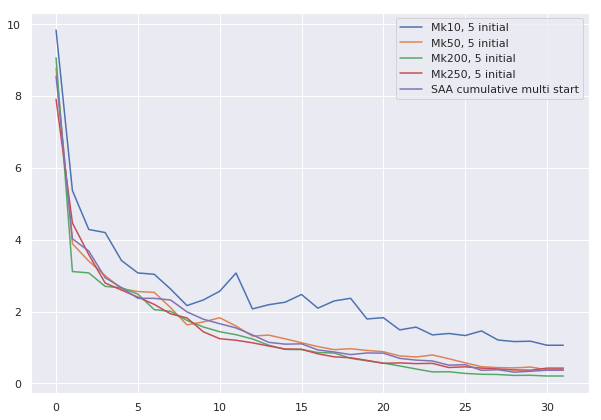

In [36]:
plt.figure(figsize=(10,7))
plt.plot(avg_sugg_obj_initial5_Mk10_Mj1[3:], label="Mk10, 5 initial")
plt.plot(avg_sugg_obj_initial5_Mk50_Mj1[3:], label="Mk50, 5 initial")
plt.plot(avg_sugg_obj_initial5_Mk200_Mj1[3:], label="Mk200, 5 initial")

plt.plot(avg_sugg_obj_initial5_Mk250_Mj1[3:], label="Mk250, 5 initial")
#plt.plot(avg_sugg_obj_initial5_Mk300_Mj1[3:], label="Mk300, 5 initial")

plt.plot(avg_sugg_obj_saa_cumulative_multi[3:], label="SAA cumulative multi start")
plt.legend()
plt.show()

### Plotting with error

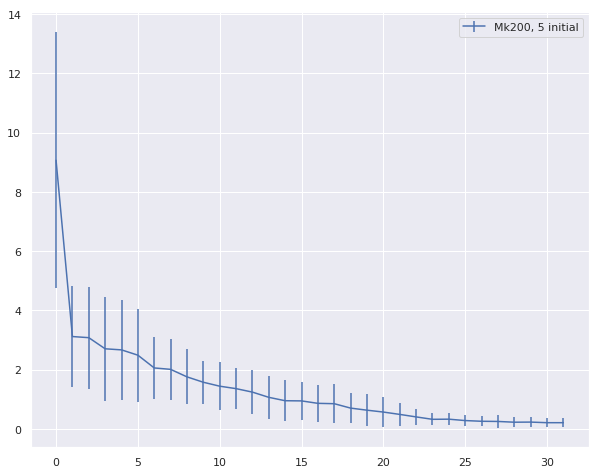

In [37]:
plt.figure(figsize=(10,8))
plt.errorbar([iter_num for iter_num in range(len(avg_sugg_obj_initial5_Mk200_Mj1)-3)],
             avg_sugg_obj_initial5_Mk200_Mj1[3:],
            sugg_obj_initial5_Mk200_Mj1_std_err[3:], label = "Mk200, 5 initial")
# plt.errorbar([iter_num for iter_num in range(len(avg_sugg_obj_initial5_Mk200_Mj1)-3)],
#              avg_sugg_obj_initial5_Mk10_Mj1[3:],
#             sugg_obj_initial5_Mk10_Mj1_std_err[3:], label = "Mk200, 5 initial")
plt.legend()

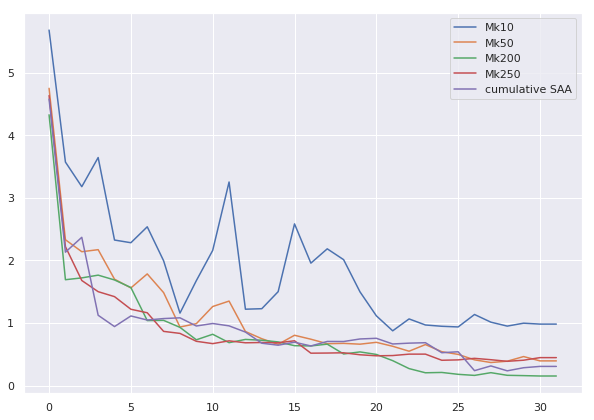

In [41]:
plt.figure(figsize=(10,7))

plt.plot(sugg_obj_initial5_Mk10_Mj1_std_err[3:],label="Mk10")
plt.plot(sugg_obj_initial5_Mk50_Mj1_std_err[3:],label="Mk50")
plt.plot(sugg_obj_initial5_Mk200_Mj1_std_err[3:],label="Mk200")
plt.plot(sugg_obj_initial5_Mk250_Mj1_std_err[3:],label="Mk250")
#plt.plot(sugg_obj_initial5_Mk300_Mj1_std_err[3:],label="Mk300")
plt.plot(sugg_obj_cumulative_saa_multi_std_err[3:], label="cumulative SAA")
#plt.ylim(ymin=0, ymax=10)
plt.legend()


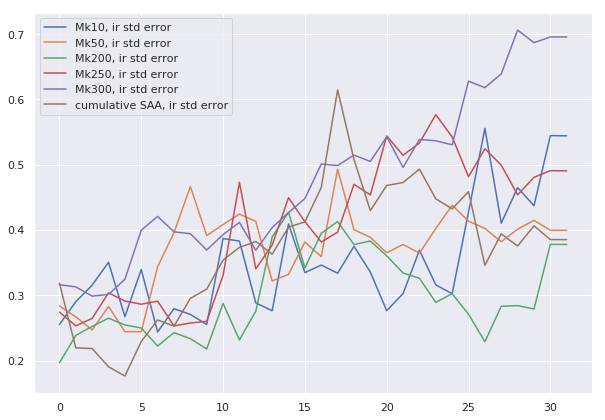

In [40]:
plt.figure(figsize=(10,7))
plt.plot(irs_initial5_Mk10_Mj1_std_err[3:], label="Mk10, ir std error")
plt.plot(irs_initial5_Mk50_Mj1_std_err[3:], label="Mk50, ir std error")
plt.plot(irs_initial5_Mk200_Mj1_std_err[3:], label="Mk200, ir std error")
plt.plot(irs_initial5_Mk250_Mj1_std_err[3:], label="Mk250, ir std error")
plt.plot(irs_initial5_Mk300_Mj1_std_err[3:], label="Mk300, ir std error")
plt.plot(irs_cumulative_saa_multi_std_err[3:], label="cumulative SAA, ir std error")
plt.legend()
plt.show()